In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

## SME - Homodyne detection

10.0%. Run time:   6.83s. Est. time left: 00:00:01:01
20.0%. Run time:  13.61s. Est. time left: 00:00:00:54
30.0%. Run time:  21.97s. Est. time left: 00:00:00:51
40.0%. Run time:  29.35s. Est. time left: 00:00:00:44
50.0%. Run time:  35.05s. Est. time left: 00:00:00:35
60.0%. Run time:  41.15s. Est. time left: 00:00:00:27
70.0%. Run time:  47.63s. Est. time left: 00:00:00:20
80.0%. Run time:  56.44s. Est. time left: 00:00:00:14
90.0%. Run time:  62.95s. Est. time left: 00:00:00:06
100.0%. Run time:  68.74s. Est. time left: 00:00:00:00
Total run time:  68.90s


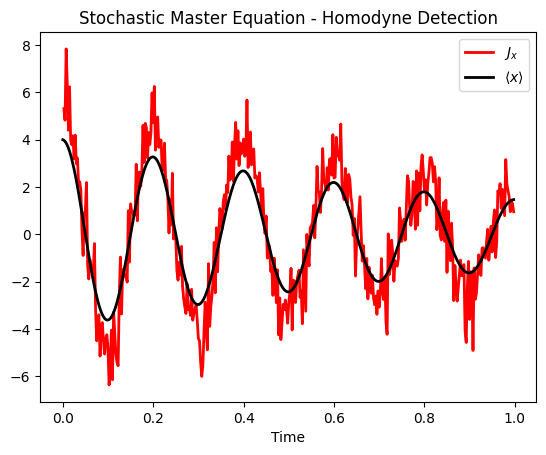

In [ ]:
# parameters
DIM = 20               # Hilbert space dimension
DELTA = 5 * 2 * np.pi  # cavity detuning
KAPPA = 2              # cavity decay rate
INTENSITY = 4          # intensity of initial state
NUMBER_OF_TRAJECTORIES = 500 # number of trajectories

# operators
a = destroy(DIM) # annihilation operator
x = a + a.dag() # position operator
H = DELTA * a.dag() * a # Hamiltonian

rho_0 = coherent(DIM, np.sqrt(INTENSITY)) # initial state
times = np.arange(0, 1, 0.0025) # time vector

# solve the master equation using the stochastic master equation with homodyne detection
stoc_solution = smesolve(
    H, rho_0, times,
    c_ops=[],
    sc_ops=[np.sqrt(KAPPA) * a],
    e_ops=[x],
    ntraj=NUMBER_OF_TRAJECTORIES,
    options={"dt": 0.00125, "store_measurement": True,}
)

fig, ax = plt.subplots()
ax.set_title('Stochastic Master Equation - Homodyne Detection')
ax.plot(times[1:], np.array(stoc_solution.measurement).mean(axis=0)[0, :].real,
        'r', lw=2, label=r'$J_x$')
ax.plot(times, stoc_solution.expect[0], 'k', lw=2,
        label=r'$\langle x \rangle$')
ax.set_xlabel('Time')
ax.legend()

In [60]:
print(stoc_solution)

<StochasticResult
  Solver: smesolve
  Solver stats:
    method: None
    init time: 0.0
    preparation time: 0.026777029037475586
    run time: 68.89619731903076
    solver: 'Stochastic Master Equation Evolution'
    end_condition: 'ntraj reached'
  Time interval: [0.0, 0.9974999999999897] (400 steps)
  Number of e_ops: 1
  State not saved.
  Number of trajectories: 500
  Trajectories not saved.
>


In [61]:
print(len(stoc_solution.measurement[0]))
#Wtf
with open("mia_lista.txt", "w") as file:
    file.write("\n".join(str(e) for e in stoc_solution.measurement))


1


In [62]:
print(stoc_solution.measurement[0].shape)

(1, 399)


In [63]:
print(times)

[0.     0.0025 0.005  0.0075 0.01   0.0125 0.015  0.0175 0.02   0.0225
 0.025  0.0275 0.03   0.0325 0.035  0.0375 0.04   0.0425 0.045  0.0475
 0.05   0.0525 0.055  0.0575 0.06   0.0625 0.065  0.0675 0.07   0.0725
 0.075  0.0775 0.08   0.0825 0.085  0.0875 0.09   0.0925 0.095  0.0975
 0.1    0.1025 0.105  0.1075 0.11   0.1125 0.115  0.1175 0.12   0.1225
 0.125  0.1275 0.13   0.1325 0.135  0.1375 0.14   0.1425 0.145  0.1475
 0.15   0.1525 0.155  0.1575 0.16   0.1625 0.165  0.1675 0.17   0.1725
 0.175  0.1775 0.18   0.1825 0.185  0.1875 0.19   0.1925 0.195  0.1975
 0.2    0.2025 0.205  0.2075 0.21   0.2125 0.215  0.2175 0.22   0.2225
 0.225  0.2275 0.23   0.2325 0.235  0.2375 0.24   0.2425 0.245  0.2475
 0.25   0.2525 0.255  0.2575 0.26   0.2625 0.265  0.2675 0.27   0.2725
 0.275  0.2775 0.28   0.2825 0.285  0.2875 0.29   0.2925 0.295  0.2975
 0.3    0.3025 0.305  0.3075 0.31   0.3125 0.315  0.3175 0.32   0.3225
 0.325  0.3275 0.33   0.3325 0.335  0.3375 0.34   0.3425 0.345  0.3475
 0.35 

In [64]:
# Create a stochastic solver instance with the same Hamiltonian as the
# previous evolution.

#Misura omodina
solver = SMESolver(
    H, 
    heterodyne=False, 
    sc_ops=[np.sqrt(KAPPA) * a],
    options={"dt": 0.00125, "store_measurement": True,}
)

#Creo rumore di Wiener
# Per il rumore di Wiener, usiamo un incremento gaussiano con media 0
dt = 0.00125
my_tlist = np.arange(0, 1, dt)
n_steps = len(my_tlist) - 1
n_sc_ops= 1 # perché abbiamo uno sc_ops

# Wiener incrementi ~ N(0, sqrt(dt))
wiener_noise = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(n_sc_ops, n_steps))



In [65]:
print(wiener_noise.shape)
print(len(my_tlist))

(1, 799)
800


In [ ]:
# Run the evolution, noise - WORKA!!!!!!!
recreated_solution = solver.run_from_experiment(
    rho_0, 
    tlist=my_tlist,
    e_ops=[H],
    # The third parameter is the measurement, not the Wiener increment
    #measurement=True,
    noise=wiener_noise
)



C:\Users\campa\AppData\Local\Temp\ipykernel_19488\170219937.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


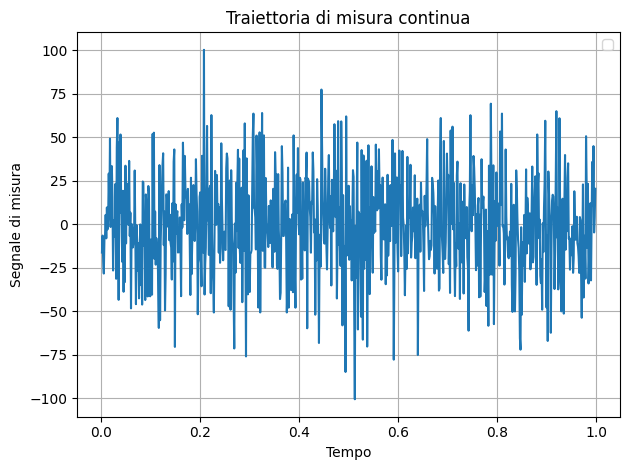

In [78]:
plt.plot(recreated_solution.times[1:], recreated_solution.measurement[0][0:])
plt.xlabel("Tempo")
plt.ylabel("Segnale di misura")
plt.title("Traiettoria di misura continua")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# Parametri
gamma = 1.0  # tasso di decadimento
ntraj = 10   # numero di traiettorie
tlist = np.linspace(0, 5, 200)

# Stato iniziale: qubit eccitato |1>
psi0 = basis(2, 1)

# Hamiltoniano: nessuna dinamica interna
H = 0 * sigmaz()

# Operatore di decadimento
c_ops = [np.sqrt(gamma) * sigmam()]

# Evoluzione con salti quantistici
result = mcsolve(H, psi0, tlist, c_ops=c_ops, e_ops=[], ntraj=ntraj, options=Options(store_states=True))

# Accesso agli stati delle traiettorie
# result.runs_states è una lista di liste: [ [stato_t0, stato_t1, ...] per ogni traiettoria ]
states_all_trajectories = result.runs_states

# Esempio: calcolo della popolazione eccitata <1|rho|1> per ogni traiettoria
excited_populations = np.zeros((ntraj, len(tlist)))

for k, traj in enumerate(states_all_trajectories):
    for i, state in enumerate(traj):
        excited_populations[k, i] = expect(num(2), state)

# Media sulle traiettorie
mean_population = np.mean(excited_populations, axis=0)

# Plot
plt.figure(figsize=(8, 4))
for k in range(ntraj):
    plt.plot(tlist, excited_populations[k], alpha=0.3, label=f"Traiettoria {k+1}" if k < 5 else "", color='gray')
plt.plot(tlist, mean_population, color='blue', linewidth=2, label="Media")
plt.xlabel("Tempo")
plt.ylabel("Popolazione eccitata")
plt.title("Decadimento spontaneo - Quantum jump trajectories")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.03s. Est. time left: 00:00:00:00
30.0%. Run time:   0.05s. Est. time left: 00:00:00:00
40.0%. Run time:   0.08s. Est. time left: 00:00:00:00
50.0%. Run time:   0.11s. Est. time left: 00:00:00:00
60.0%. Run time:   0.14s. Est. time left: 00:00:00:00
70.0%. Run time:   0.17s. Est. time left: 00:00:00:00
80.0%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
100.0%. Run time:   0.25s. Est. time left: 00:00:00:00
Total run time:   0.27s


TypeError: 'NoneType' object is not iterable